In [1]:
import numpy as np
from matplotlib import gridspec
from matplotlib import pyplot as plt
from scipy.stats import norm

In [2]:
def plot_annotation(ax, x):
    ax.scatter(x, np.zeros_like(x), label="annotation")

def plot_prediction(ax, x, mu, sigma):
    ax.plot(x, norm.pdf(x, mu, sigma), label="prediction")

def pit_histogram(ax, x, mu, sigma):
    ax.hist(norm.cdf(x, loc=mu, scale=sigma))
    ax.set_xlabel("probability integral transform")
    ax.set_ylabel("count")

def reliability_diagram(ax, x, mu, sigma):
    def reliability(confidence):
        a, b = norm.interval(confidence, loc=mu, scale=sigma)
        return np.sum((a < x) & (x < b)) / len(x)
    confidences = np.linspace(0.0, 1.0, num=11)
    ax.plot(confidences, list(map(reliability, confidences)), marker="o")
    ax.plot(confidences, confidences)

In [3]:
def plot_unimodal(ax, x, loc, scale):
    ax.plot(x, norm.pdf(x, loc, scale), label="distribution")
    ax.set_xlabel("y")
    ax.set_ylabel("p(y)")

def unimodal(mu, sigma, loc=0, scale=1, n=1000, start=-4, stop=4):
    y = np.random.default_rng().normal(loc=loc, scale=scale, size=n)
    domain = np.linspace(start, stop)    
    fig = plt.figure(tight_layout=True)
    gs = gridspec.GridSpec(2, 2)
    ax0 = fig.add_subplot(gs[0, :])
    ax1 = fig.add_subplot(gs[1, 0])
    ax2 = fig.add_subplot(gs[1, 1])
    plot_annotation(ax0, y)
    plot_unimodal(ax0, domain, loc, scale)
    plot_prediction(ax0, domain, mu, sigma)
    ax0.legend()
    pit_histogram(ax1, y, mu, sigma)
    reliability_diagram(ax2, y, mu, sigma)

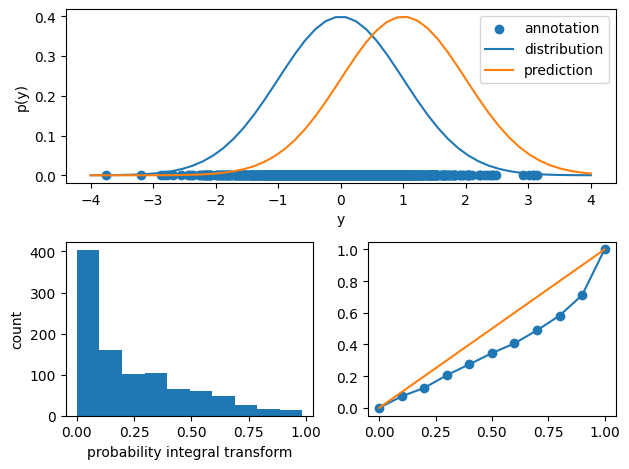

In [4]:
unimodal(1, 1)

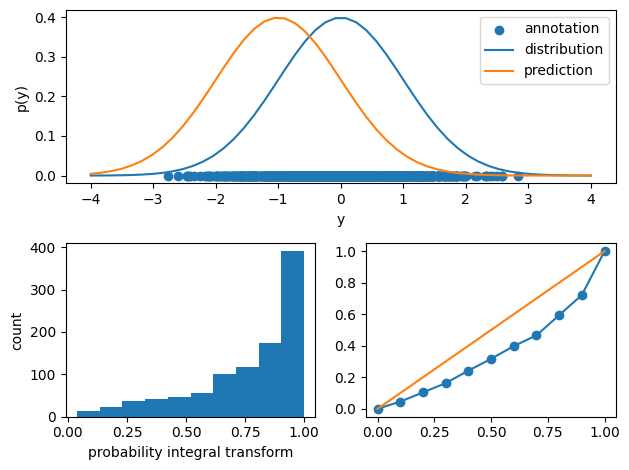

In [5]:
unimodal(-1, 1)

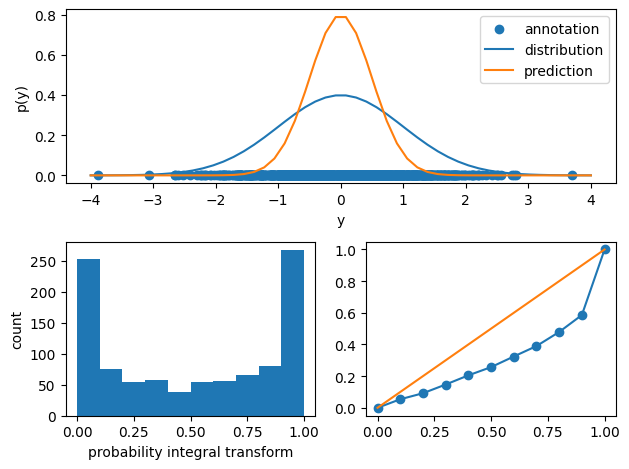

In [6]:
unimodal(0, 0.5)

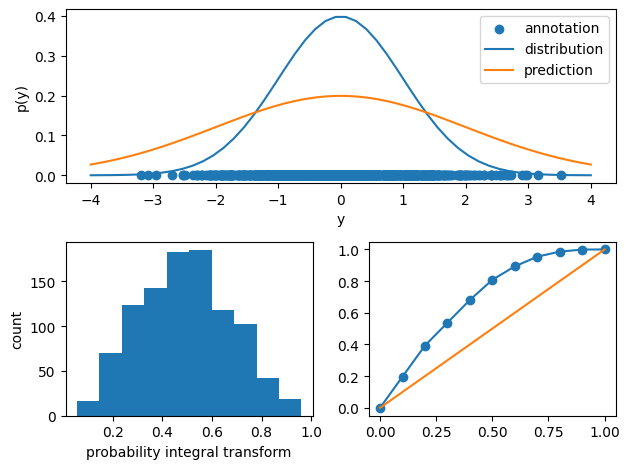

In [7]:
unimodal(0, 2)

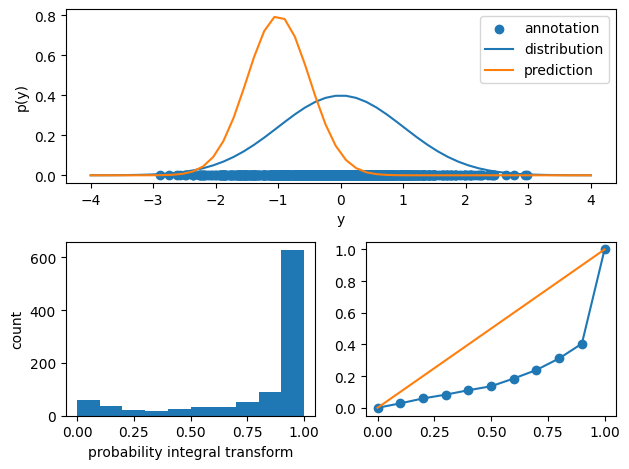

In [8]:
unimodal(-1, 0.5)

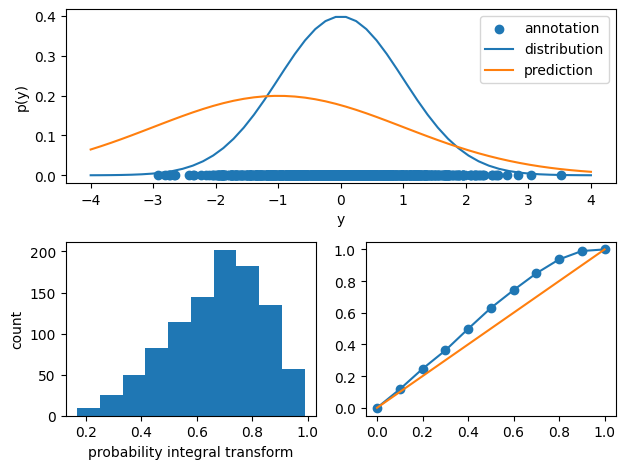

In [9]:
unimodal(-1, 2)

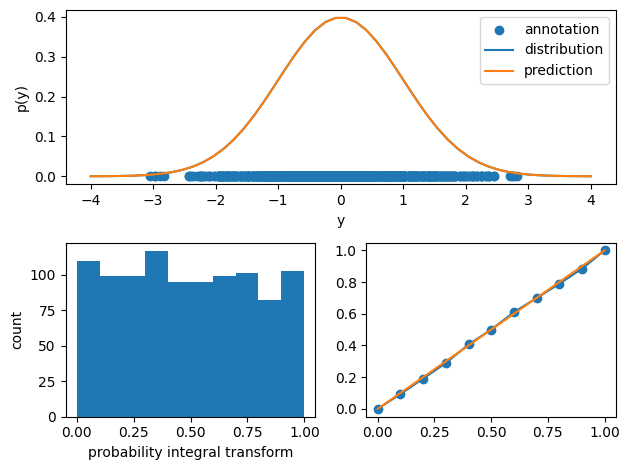

In [10]:
unimodal(0, 1)

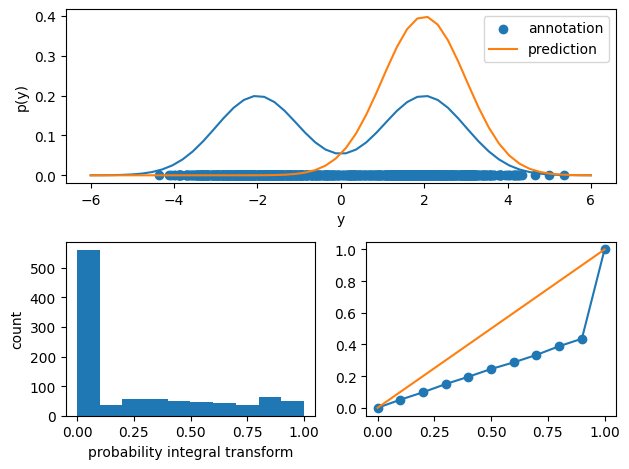

In [11]:
def plot_multimodal(ax, x, coef, loc, scale):
    ax.plot(x, coef[0] * norm.pdf(x, loc[0], scale[0]) + coef[1] * norm.pdf(x, loc[1], scale[1]))
    ax.set_xlabel("y")
    ax.set_ylabel("p(y)")

def multimodal(mu, sigma, coef=[0.5, 0.5], loc=[-2, 2], scale=[1, 1], n=1000, start=-6, stop=6):
    fig = plt.figure(tight_layout=True)
    gs = gridspec.GridSpec(2, 2)
    ax0 = fig.add_subplot(gs[0, :])
    ax1 = fig.add_subplot(gs[1, 0])
    ax2 = fig.add_subplot(gs[1, 1]) 
    y = np.random.default_rng().normal(loc=loc, scale=scale, size=(n, len(coef)))[np.arange(n), np.random.choice(np.arange(len(coef)), size=n, p=coef)]
    plot_annotation(ax0, y)
    domain = np.linspace(start, stop)
    plot_multimodal(ax0, domain, coef, loc, scale)
    plot_prediction(ax0, domain, mu, sigma)
    ax0.legend()
    pit_histogram(ax1, y, mu, sigma)
    reliability_diagram(ax2, y, mu, sigma)

multimodal(2, 1)

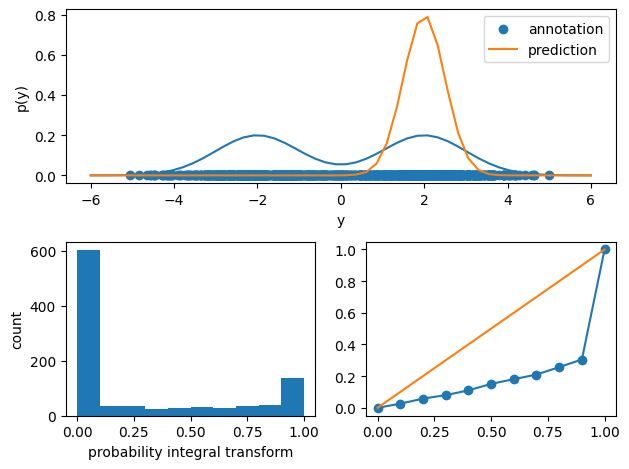

In [12]:
multimodal(2, 0.5)

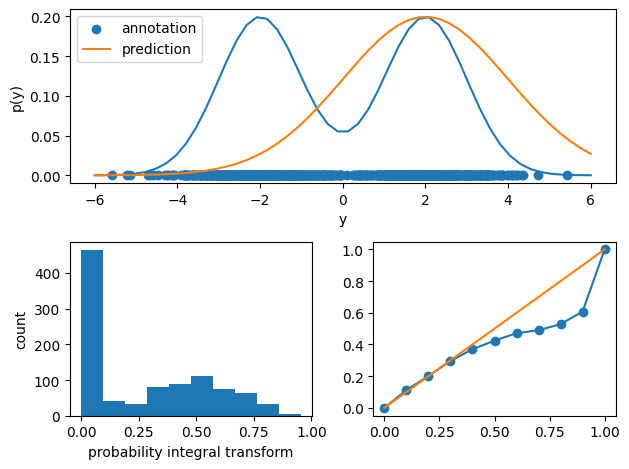

In [13]:
multimodal(2, 2)

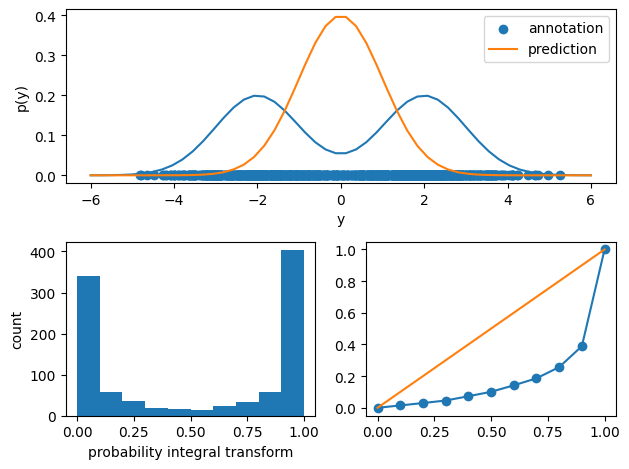

In [14]:
multimodal(0, 1)

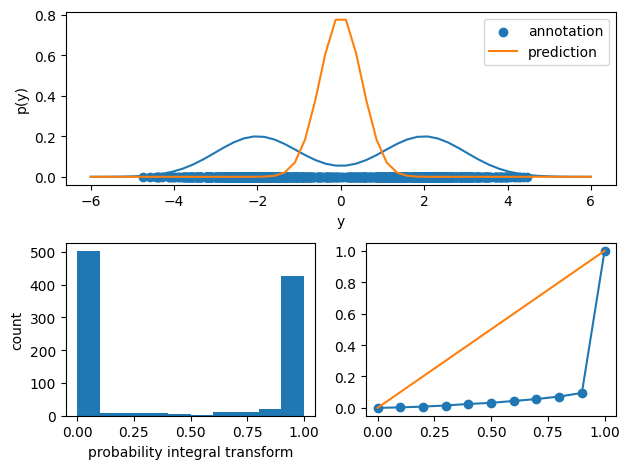

In [15]:
multimodal(0, 0.5)

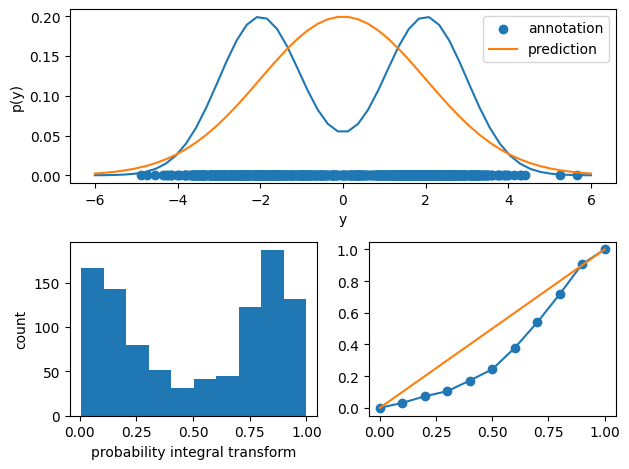

In [16]:
multimodal(0, 2)

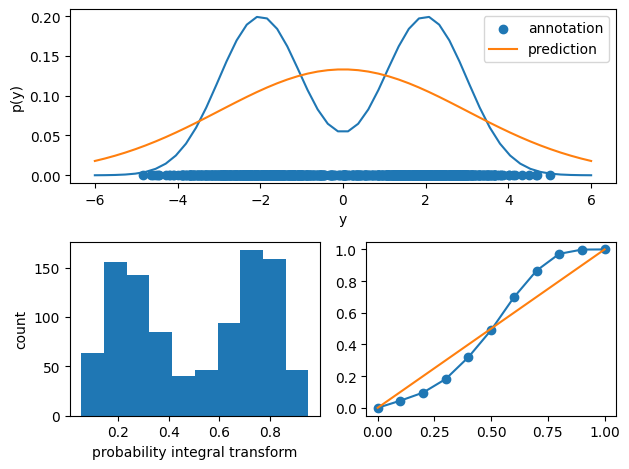

In [17]:
multimodal(0, 3)

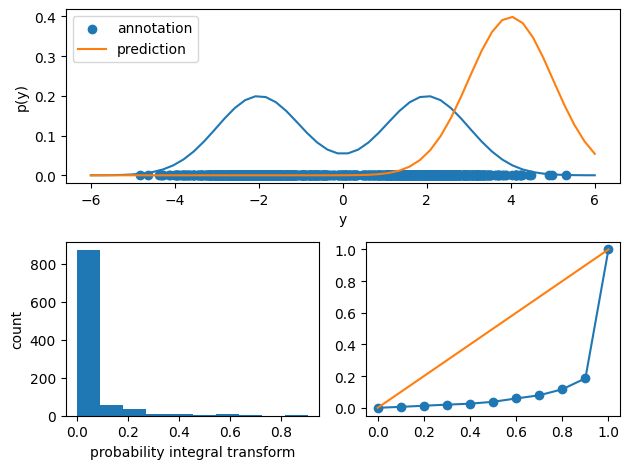

In [18]:
multimodal(4, 1)

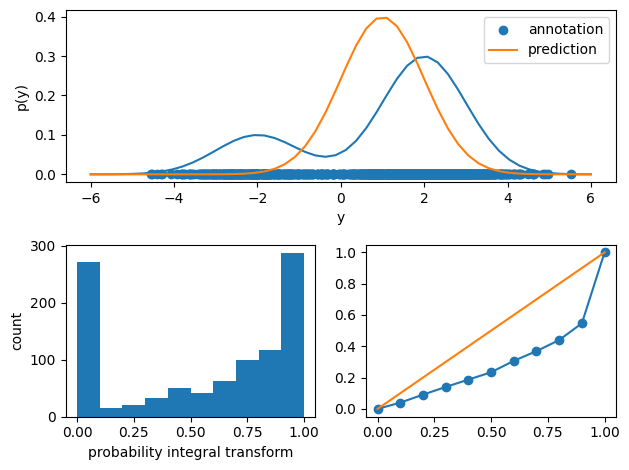

In [19]:
multimodal(1, 1, coef=[0.25, 0.75])

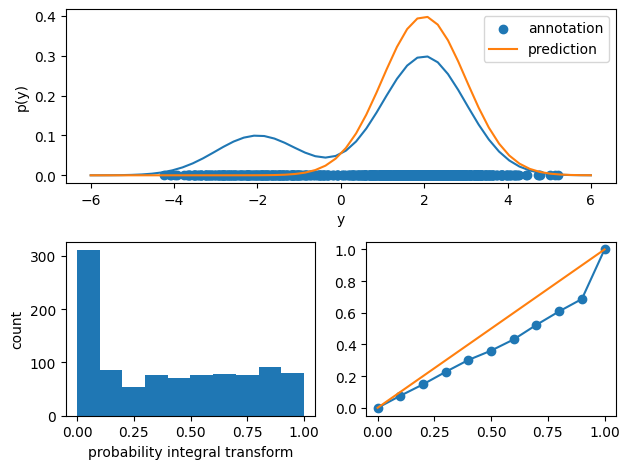

In [20]:
multimodal(2, 1, coef=[0.25, 0.75])

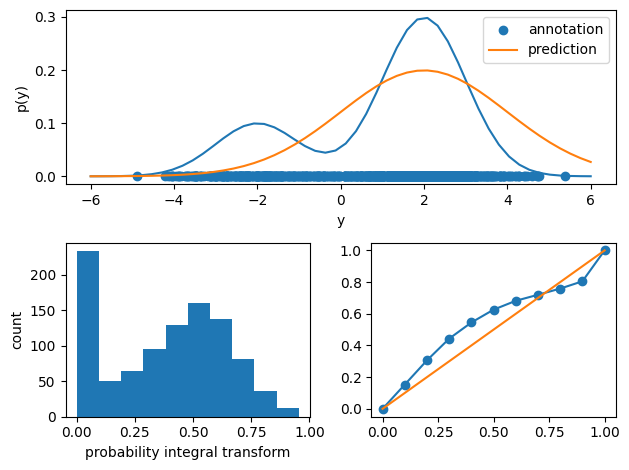

In [21]:
multimodal(2, 2, coef=[0.25, 0.75])

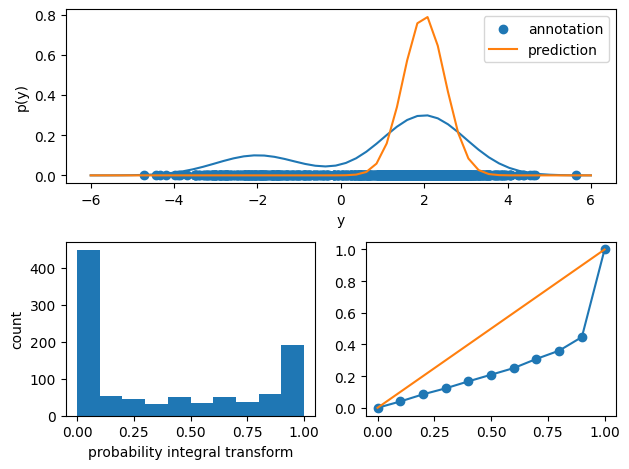

In [22]:
multimodal(2, 0.5, coef=[0.25, 0.75])

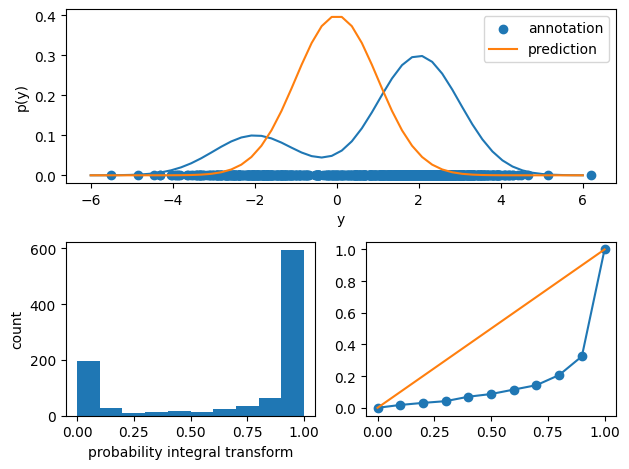

In [23]:
multimodal(0, 1, coef=[0.25, 0.75])

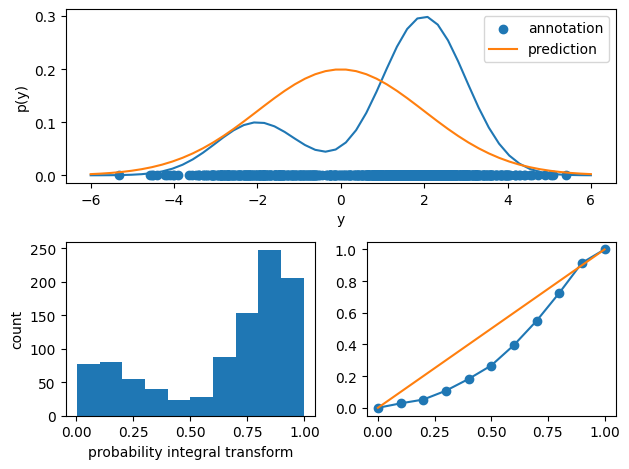

In [24]:
multimodal(0, 2, coef=[0.25, 0.75])

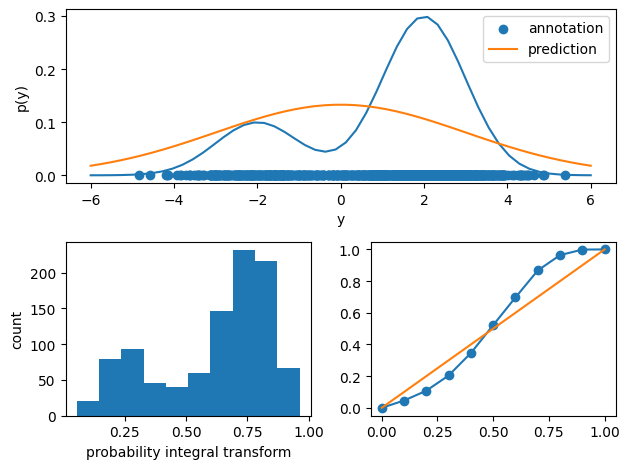

In [25]:
multimodal(0, 3, coef=[0.25, 0.75])